# Machine Learning with Python

Collaboratory workshop, 10/13/2021

This is a notebook developed for the second day of the Collaboratory Workshop, Machine Learning with Python. For more information, go to the workshop home page:

https://github.com/kose-y/W17.MachineLearning/wiki/Day-2

- __Day 1__ - Fundamentals and Motivation
- __Day 2__ - Classification and Cross-Validation
    - Assessing the performance of your models
    - Learning to choose and use models from Scikit-learn
    - Properly cross-validating
- __Day 3__ - Regression and Unsupervised Learning

Open Jupyter Notebook and load `numpy` and `matplotlib.pyplot`. 

## A little note on numpy indexing

In [1]:
import numpy as np
l = [[1,2,3,4],[10,20,30,40],[100,200,300,400]]
A = np.array(l)

This type of indexing appeared on yesterday's workshop:

In [2]:
A[1]

array([10, 20, 30, 40])

This is similar to how indexing works on the original nested list `l`:

In [3]:
l[1]

[10, 20, 30, 40]

Incidentally, this is equivalent to using `A[1, :]`. 

## Installing an additional package (Optional, for local installations)

Let's install another package for today's workshop: `graphviz`. This package is for visualizing graphs (or networks), a data structure consisting of nodes and edges connecting the nodes. In this workshop, it will be used for visualizing decision trees. 

If you are on Windows, open `Anaconda Prompt`. Ohterwise, open a terminal (also accesible on JupyterLab). Then type:

```
conda install python-graphviz
```

This is a simple way to install an anaconda-supported package. 

_Note_: This is already done for Binder environment.

Now, let's load packages for today's workshop:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15 # increase font size in the figure

## Loading the synthetic data

Let's consider a simple but useful example:
<div>
<img src="SyntheticDataset.png" width="500"/>
</div>
Even if the solution is intuitive, we will use it to introduce may of the methods used in Machine Learning.

You can download this data in our [wiki](https://github.com/kose-y/W17.MachineLearning/wiki/Day-2), or using this [direct link](https://github.com/kose-y/W17.MachineLearning/raw/master/materials/day_2/Day2_testdataset.zip). This is also uploaded to Google Drive. After downloading, move the file to the direcory where your notebook is and unzip it. You should now have two files: 

* ```CollML_testdataset_features.dat```: contains feature values for each sample
* ```CollML_testdataset_labels.dat```: contains the class of each sample

In [5]:
features_origin = np.loadtxt('CollML_testdataset_features.dat')
labels_origin = np.loadtxt('CollML_testdataset_labels.dat')

Number of samples and features: 

In [6]:
print("Shape of features", features_origin.shape)
print("Shape of labels", labels_origin.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [7]:
np.unique(labels_origin)   ## shows unique values in an array

array([0., 1.])

We want to create a classifier that reproduces the labels in the NumPy array _labels_ based on _features_. Based on the shapes shown above, we have 2 features, and 500 samples.

## Training-Test pipeline


Before doing anyting, it is a good practice to split the dataset into training set and test set. 

To evaluate the performance of an algorithm after training a model objectively, we split the data into a "training set" and a "test set".

- training set (learning set): used to fit the machine learning model.
- test set: used to evaluate the fit machine learning model. 
    - Shall not be used in training, to see how well the model _generalizes_ to the data yet to be seen by the classifier. 
    - It will be our _final proof_. We will use other methods _not_ involving this test set to estimate accuracy during the creation of the model: validation set, cross validation, out-of-bag accuracy, etc.
    
<div>
<img src="learn_test.png" width="500"/>
</div>

Scikit-learn has a function `train_test_split()` to do this. 

_Note: One can press `Shift+Tab` to see function documentation._

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
features, features_test, labels, labels_test = train_test_split( 
                features_origin, labels_origin, test_size=0.2,
                shuffle=False) 

It is common to shuffle the data before the split. We are putting `shuffle=False` in this notebook just to make sure that everyone has the same data split.

In [10]:
print("Shape of the whole dataset",features_origin.shape)
print("Shape of the train dataset",features.shape)
print("Shape of the test dataset",features_test.shape)

Shape of the whole dataset (500, 2)
Shape of the train dataset (400, 2)
Shape of the test dataset (100, 2)


We will train only on `features` and `labels`, and test on `features_test` and `labels_test`. It is a good practice to not even look at the test set at this point. 

## Visualization

Let's start by visualizing this dataset.

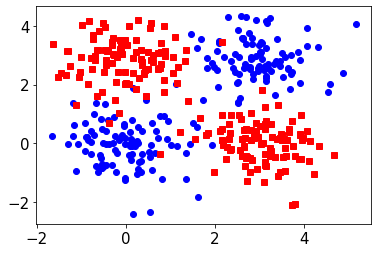

In [11]:
plt.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'bo'  )
plt.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 'rs'  )
plt.show()

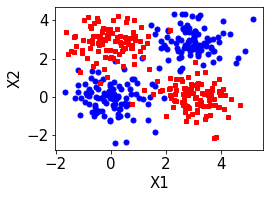

In [12]:
## Re-doing the previous plot, but with more details
plt.figure( figsize=(4,3) )
plt.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'o',
           markersize=5, color='b')
plt.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 's',
           markersize=4, color='r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout()
plt.savefig('SyntheticDataset.png', dpi=500)
plt.show()

## Decision Trees  - Synthetic data

Let's start creating our Decision Tree classifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Variable `clf` will contain all information learned by the classifier. To perform the learning step, we use the method `fit`:

In [14]:
clf.fit( features, labels )

DecisionTreeClassifier()

To find the accuracy of this classifier, we can use the method `score`.

In [15]:
clf.score( features, labels ) 

1.0

That means that our classifier was able to perfectly reproduce all points.

We are not doing this to `features_test` or `labels_test` yet: we're still working on the model.

### Visualizing the tree -- Are we overfitting?

The learned tree can be visualized through the package `graphviz`.

In [16]:
from sklearn.tree import export_graphviz
import graphviz # Python interface for graphviz library
def show_tree(clf):
    filename = 'tmp.dat'
    export_graphviz(clf, filename) 
    return graphviz.Source.from_file(filename)  

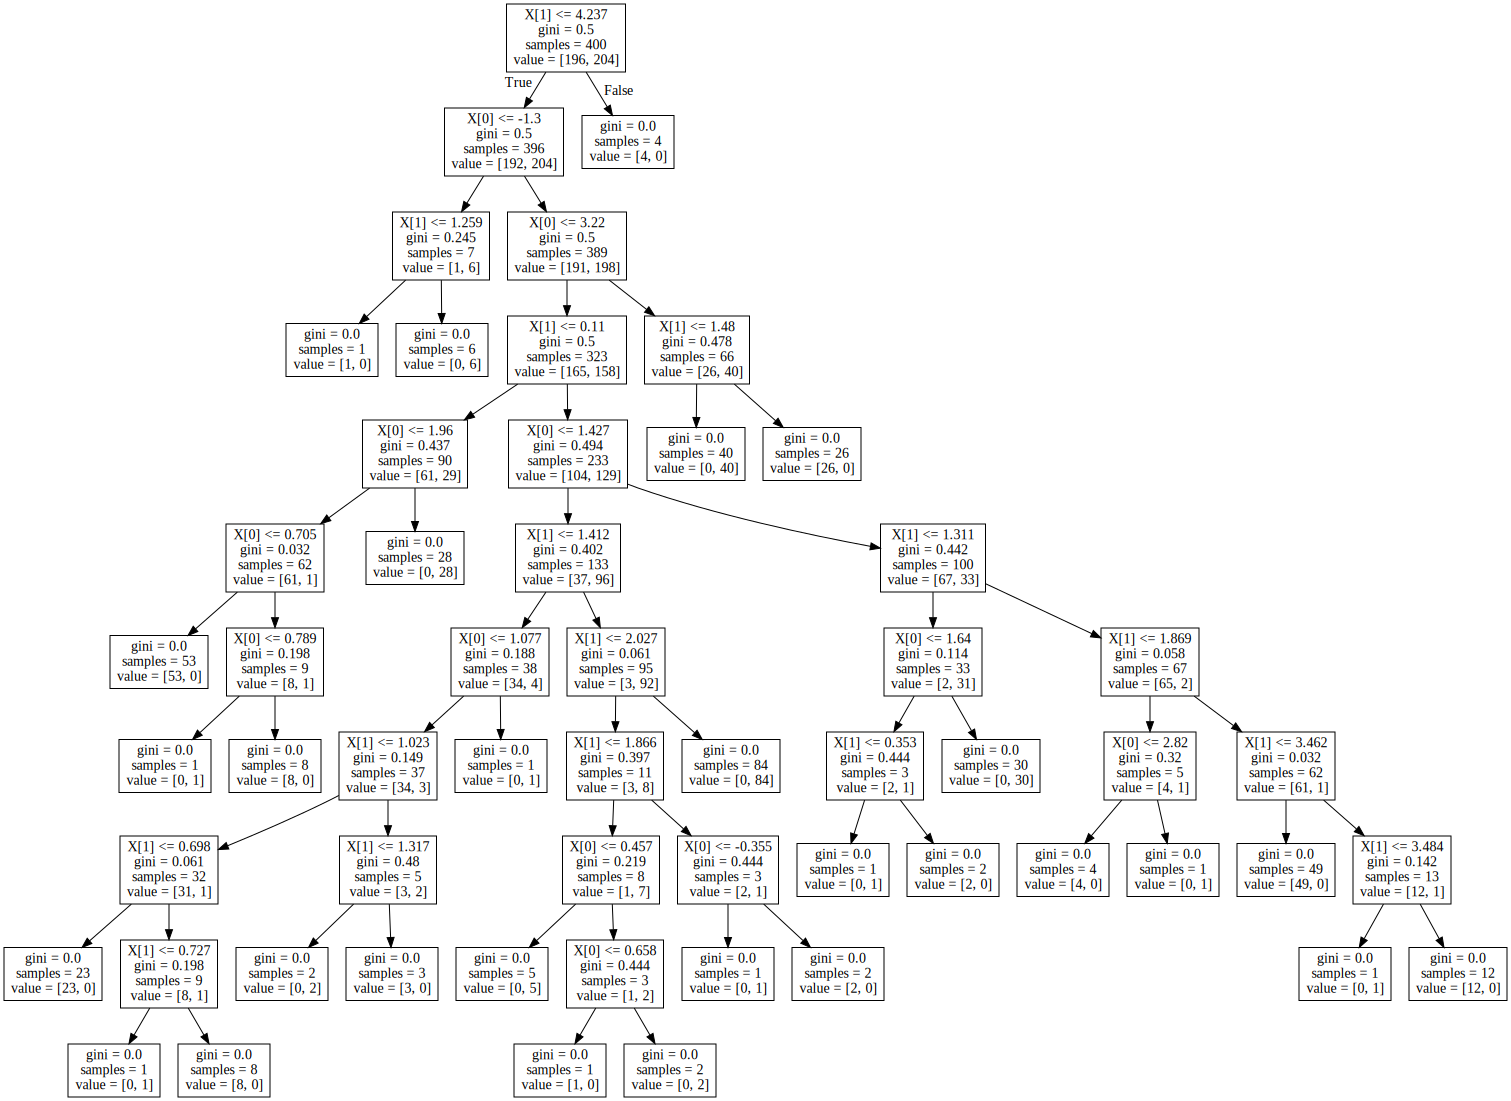

In [17]:
show_tree(clf)

Doesn't it seem too complex?

### Feature importance

Another clue to check if we are overfitting.

- Splitting is performed according to a measure of dispersion (impurity) of the data.
- Scikit-learn uses Gini impurity as default
- This enables the evaluation of an importance index for each feature that represents how much they contributed to the overall classification

Importance weight based on Gini impurity

In [18]:
clf.feature_importances_

array([0.3439022, 0.6560978])

Attributes ending with `_`: something that is determined when the model is fit.

Looking at the plot, we know that the point $P_1 = [-1,-1]$ should be of class 0 (zero), and the point $P_2 = [-1,4]$ should belong to class 1. Let's Check the classifier's prediction:

In [19]:
P1 = np.array([[-1,-1]])
P2 = np.array([[-1,4]])

print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [0.]
Prediction for P2:  [1.]


**Question:** Why did we use [[ and ]] in the previous cell?

You can also check the probability that a given point belongs to a class:

In [20]:
print("Probability for P1: ", clf.predict_proba(P1))
print("Probability for P2: ", clf.predict_proba(P2))

Probability for P1:  [[1. 0.]]
Probability for P2:  [[0. 1.]]


### Drawing the decision boundary

Next, let's investigate the "decision boundaries" -- i.e. the boundary between classes

#### Drawing the decision boundary using `meshgrid` and `ravel`

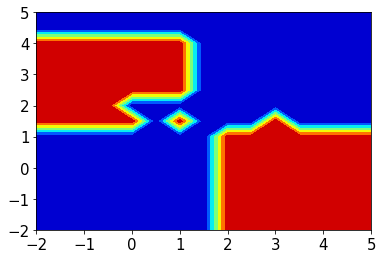

In [21]:
delta = 0.5
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] ) 
# c_[a, b] concatenates two arrays horizontally. thus, np.c_[X.ravel(), Y.ravel()] is (len(x) len(y)) x 2 matrix, containing all the grid points.
# Z contains prediction result for each grid point.
# reshape to fit to the shape of the original grid
Z    = Z.reshape( X.shape ) 

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet')) # draws filled contours. blue for class 0, red for class 1.

plt.show()

In [23]:
np.arange(-2.0, 5.001, delta)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ])

#### `meshgrid` function

The `meshgrid` function returns coordinate matrices from the two coordinate vectors. If two vectors (one with length `a` and the other with length `b`) are given as its argument, it returns two 2-dimensional `a x b` arrays, each corresponding to x-coordinates and y-coordinates of `a x b` grid.

In [24]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx) # [0, 0.5, 1]
y = np.linspace(0, 1, ny) # [0, 1]
xv, yv = np.meshgrid(x, y)
print("xv = ", xv)
print("yv = ", yv)

xv =  [[0.  0.5 1. ]
 [0.  0.5 1. ]]
yv =  [[0. 0. 0.]
 [1. 1. 1.]]


#### `ravel` function

Returns a "flattened" 1-dimensional array.

In [25]:
x = np.array([[1, 2, 3], [4, 5, 6]])

In [26]:
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

#### `np.c_` concatenates columns horizontally


In [27]:
np.c_[xv.ravel(), yv.ravel()]

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

`delta` controls how fine the grid is. 

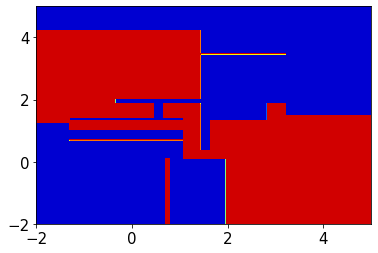

In [28]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

plt.show()

### Restricting the decision tree
Our model is too complex, we overfit the model. 
- Need to reduce complexity of the model, e.g., depth of the tree.

Let's use some of the hyper-parameters available in Scikit-learn to modify the learning process.

0.8225


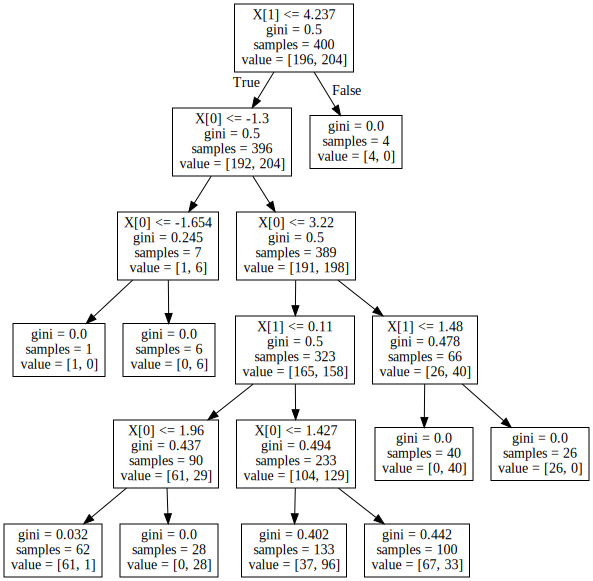

In [29]:
clf = DecisionTreeClassifier( max_depth = 5 )
clf.fit( features, labels )
print( clf.score( features, labels ) )
show_tree( clf )

We see reduced training accuracy. 

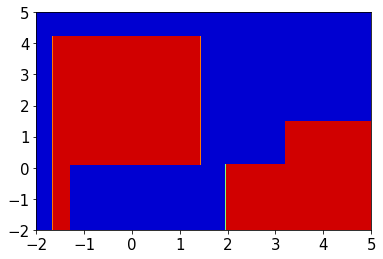

In [30]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)


plt.show()

This looks better. 

## Random forests

- Random forests are among the most important models in Machine Learning, especially for applications that demand low latency. 
- An ensemble of decision trees: we train many decision trees and make a decision based on them. (e.g. majority voting)
- Each tree is trained with a subsample of the dataset

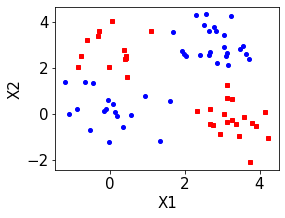

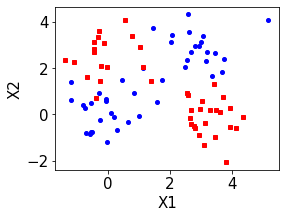

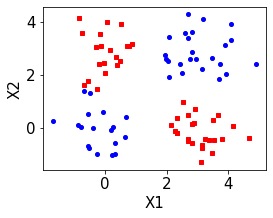

In [31]:
# plot example of sampled data:
np.random.seed(0)  # the random seed, to be sure that you always plot the same thing

for i in range (3):
    plt.figure( figsize=(4,3) )
    
    choice = np.random.random(size=len(labels))>0.8
    plt.plot( features[ np.logical_and(choice , labels == 0), 0 ], features[ np.logical_and(choice , labels == 0), 1 ], 'o',
               markersize=4, color='b')
    plt.plot( features[ np.logical_and(choice , labels == 1), 0 ], features[ np.logical_and(choice , labels == 1), 1 ], 's',
               markersize=4, color='r')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

We use the class `RandomForestClassifier` for random forests:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- The "subsampled" datasets are obtained by performing a bagging procedure (or bootstrap aggregation)

Coding-wise, creating a random forest is very similar to what we did to create our decision trees. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier( n_estimators = 50, 
                            max_depth = 5, oob_score = True )
clf.fit( features, labels )
print("Out of bag score",clf.oob_score_)

Out of bag score 0.9425


`clf.oob_score_`: out-of-bag score, score of each classifier (decision tree) in the ensemble by using data points not considered for training that classifier
- if 80% of the data fed are used for fitting a single decision tree in a random forest, the remaining 20% are used to compute the out-of-bag score. 

In [34]:
print("Accuracy score: ",clf.score(features,labels))
print("Features importance: ",clf.feature_importances_) 

Accuracy score:  0.9725
Features importance:  [0.49441217 0.50558783]


We see much more balanced importance between the two features.

In [35]:
print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [0.]
Prediction for P2:  [1.]


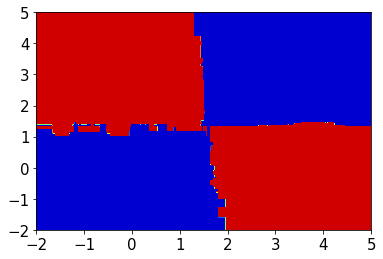

In [36]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.show()

These decision boundaries seems better than that for decision trees.

Because random forests are ensembles of decision trees, there is a way to accesss the trees and inspect them closely. To do so, use the attribute ```estimators_``` of your model.

In [37]:
clf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1325117475)

Let's check how to visualize trees in the random forest model we just created.

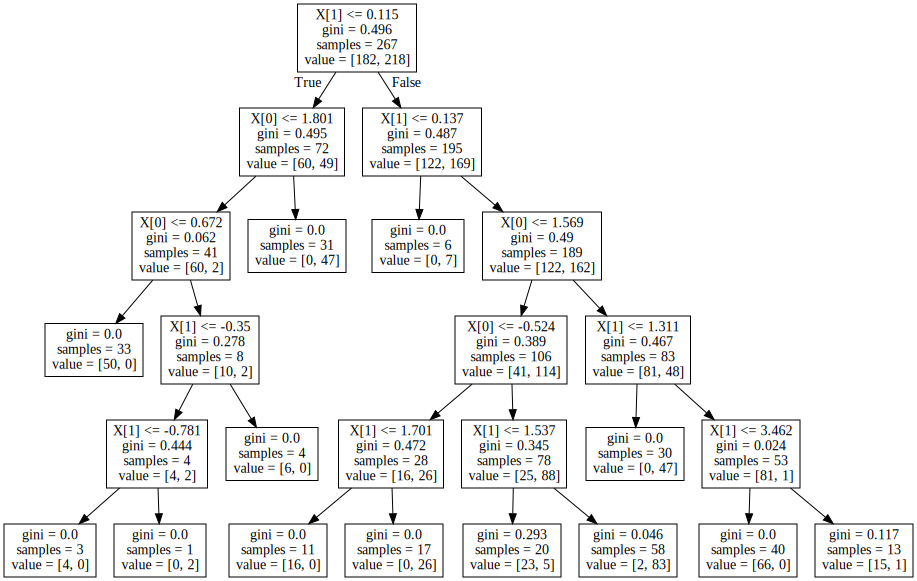

In [38]:
show_tree( clf.estimators_[0])

## Another ensemble method: AdaBoost

- Ensemble methods are very important and useful for many applications in biology. 
- One in particular is considered the __best out-of-the-box ensemble model__ considering various datasets from several areas: __AdaBoosting__ or __Adaptive Boosting__. 
- The primary idea is to fit an initial tree, and then add more trees paying more attention to those samples that the first trees were not able to classify appropriately. 

#### Idea of Boosting 
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Ensemble_Boosting.svg/2880px-Ensemble_Boosting.svg.png" width="600"/>
</div>

Each classifier is OK to be a "weak learner", just slightly better than random guess. We will train many of them, tweaking so that those misclassified has higher weight. As a whole group, the resulting classifier can be proven to be a strong learner.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
clf_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=200)
clf_adaboost.fit( features, labels )
clf_adaboost.score(features, labels)

1.0

In [41]:
clf_adaboost.feature_importances_

array([0.47465077, 0.52534923])

In [42]:
print("Prediction for P1: ", clf_adaboost.predict(P1)) # -1, -1
print("Prediction for P2: ", clf_adaboost.predict(P2)) # -1, 4

Prediction for P1:  [0.]
Prediction for P2:  [1.]


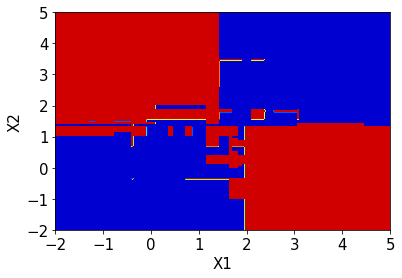

In [43]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf_adaboost.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

###  Scikit-learn Overview

Most of the models available in scikit-learn follow a very simple pattern:

- `clf = <model_name>(params)`
    - Create an object representing the model
- `clf.fit(features, labels)`
    - Trains the models considering the features as inputs and labels as target
- `clf.score(features, labels)`
    - Evaluates the model's accuracy considering the samples provided
- `clf.predict(data)`
    - Predicts the class of the data provided.


# Support Vector Machines

Support Vector Machines (or SVMs) were for a long time the most widely used model in the Machine Learning community.

Data are mapped to a point in a space, and we find a boundary so that the examples from different categories are separated by a clear gap, as wide as possible in that space. The mapping is called "kernel function".

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b7/Support_vector_machine.jpg" width="500"/>
</div>



https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

We will deal with two hyperparameters: `C` and `gamma`. 

- `C` controls how much you want to avoid misclassification
    - Low `C`, it is less sensitive to misclassification, resulting in simpler boundary
    - High `C`, it is more sensitive to misclassification, more complex boundary.

- `gamma` controls how far the influence of a single training example reaches, low meaning "far", and high meaning "close".  
    - Low `gamma`, each training example influences points further away, resulting in simpler boundary
    - High `gamma`, each training example influences only short distance, resulting in more complex boundary. 

### Creating and fitting SVM

In [44]:
from sklearn.svm import SVC

In [45]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.96


With a high value of `gamma`: 

In [46]:
clf = SVC(gamma=10000.)
clf.fit( features, labels )
print( clf.score( features, labels ) )

1.0


Let's write a function that automatically draws the decision boundaries for us (this avoids too much replication of code).

In [47]:
def plotContours(clf, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()

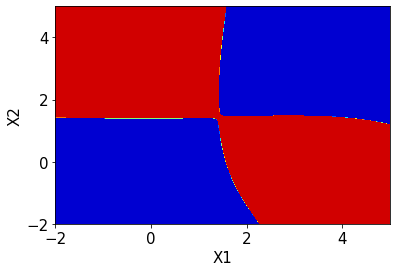

In [48]:
clf = SVC()
clf.fit( features, labels )
plotContours(clf)

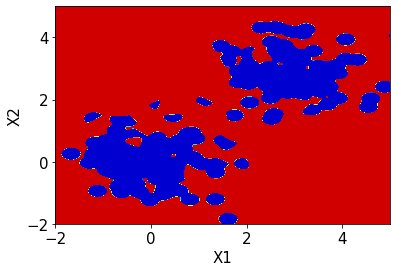

In [49]:
clf = SVC( C = 1000., gamma = 100. )
clf.fit( features, labels )
plotContours(clf)

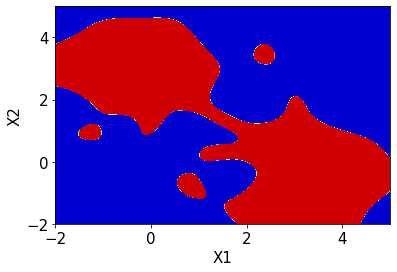

In [50]:
clf = SVC( C = 1000 ,gamma = 1)
clf.fit( features, labels )
plotContours(clf)

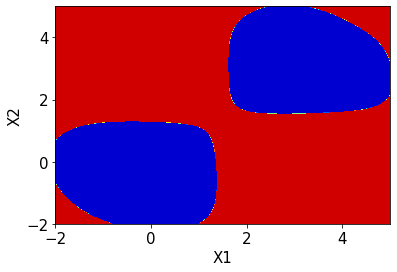

In [51]:
clf = SVC( C = 0.02 ,gamma = 1 )
clf.fit( features, labels )
plotContours(clf)

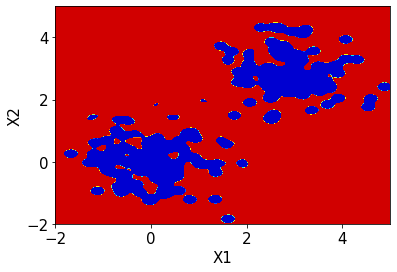

In [52]:
clf = SVC( C = 0.5, gamma = 70. )
clf.fit( features, labels )
plotContours(clf)

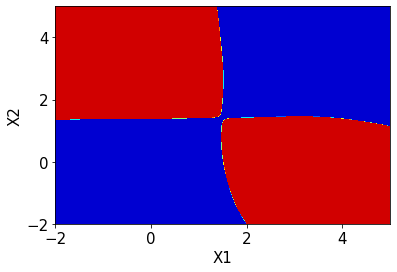

In [53]:
clf = SVC( C = 0.1, gamma = 1. )
clf.fit( features, labels )
plotContours(clf)

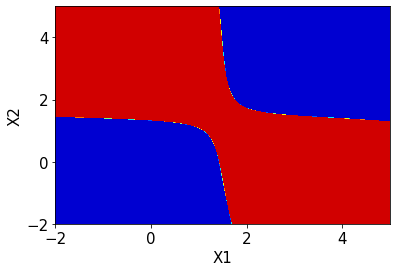

In [54]:
clf = SVC( C = 0.1, gamma = 0.1 )
clf.fit( features, labels )
plotContours(clf)

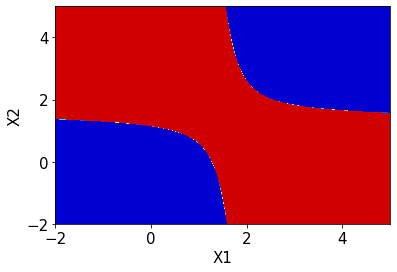

In [55]:
clf = SVC( C = 1, gamma = 0.01 )
clf.fit( features, labels )
plotContours(clf)

## Fitting the Hyperparameters

### Hyperparameters

__Hyperparameters__ are the parameters that are used to create a model. `max_depth` of decision tree, `C` and `gamma` in support vector machine, etc. 

How do we choose them while avoiding underfitting and overfitting?

You may be tempted to peek the performance on the test set and calibrate hyperparameter, but that introduces bias, and you might overfit to the test data. Remember, we want our classifiers generalize well to external data points we did not see in the training process. In this section, we cover systematic methods to tune hyperparameters without introducing bias.

### Train-Validation split

- You should not optimize hyperparameter on the same data you used during training -- you need to split the data into two sets again.
- So, we further split learning set into training set and validation set. 

<div>
<img src="train_validation.png" width="500"/>
</div>

We have split the data into three sets 
- Training set: to fit the model
- Validation set: to select hyperparameters
- Test set: to evaluate the final performance

Caution: do not mix validation set and test set. 

Next, we split training set and validation set using the function `train_test_split()`.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split( 
        features, labels, test_size=0.33,shuffle=False)

In [58]:
print("Shape of the train dataset: ", X_train.shape)
print("Shape of the validation dataset: ", X_valid.shape)

Shape of the train dataset:  (268, 2)
Shape of the validation dataset:  (132, 2)


In [60]:
clf = SVC( C = 0.001, gamma = 10. )
clf.fit( X_train, Y_train )
clf.score(X_valid, Y_valid)

0.5151515151515151

Now we compare accuracy on the validation set to choose `gamma`:

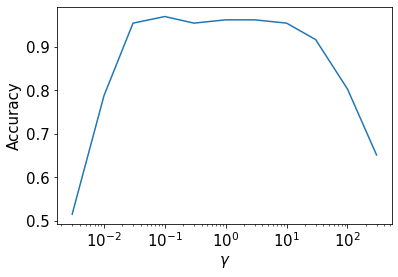

In [61]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( X_train, Y_train )
    accuracies.append( clf.score(X_valid, Y_valid) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy') # r'': raw string. backslashes mean backslashes, not escaping.
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.show()

Because the splitting is performed at random, to properly estimate accuracy it is ideal perform the train-validation splitting several times.

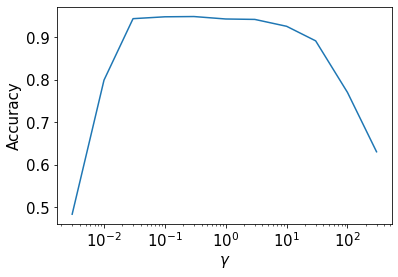

In [62]:
numRepetitions = 100
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = np.zeros( setGammas.shape )

for j in range(numRepetitions):
    k = 0
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    for gamma in setGammas:
        clf = SVC( C = 1., gamma = gamma )
        accuracies[k] += clf.fit( X_train, Y_train ).score(X_valid, Y_valid)
        
        k += 1

accuracies = accuracies / numRepetitions
plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$') 
plt.xscale('log')

plt.show()

What would happen if we evaluate performance on training set?

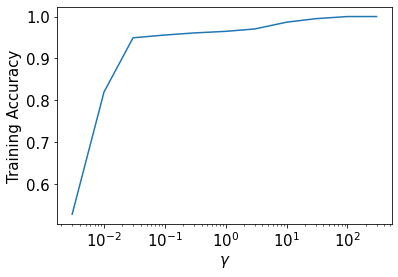

In [63]:
numRepetitions = 100
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = np.zeros( setGammas.shape )

for j in range(numRepetitions):
    k = 0
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    for gamma in setGammas:
        clf = SVC( C = 1., gamma = gamma )
        accuracies[k] += clf.fit( X_train, Y_train ).score(X_train, Y_train) # this line was changed
        
        k += 1

accuracies = accuracies / numRepetitions
plt.plot(setGammas, accuracies)

plt.ylabel(r'Training Accuracy') # this line is changed
plt.xlabel(r'$\gamma$') 
plt.xscale('log')

plt.show()

As you see, the training accuracy monotonically increases, likely to overfit on higher `gamma` when hyperparameters are tuned with training dataset. 

Estimating the accuracy

In [64]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 0.1 )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print(r"Average accuracy (gamma = 0.5): ", accuracies.mean() )


for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels,
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 100. )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print("Average accuracy (gamma = 100.): ", accuracies.mean() )

Average accuracy (gamma = 0.5):  0.9504545454545457
Average accuracy (gamma = 100.):  0.7777272727272728


## K-fold cross validation

We split learning set into $K$ pieces, and choose one of them as a validation set in a round-robin fashion. 

<div>
<img src="cross_validation.png" width="500"/>
</div>
Choose the best performing hyperparameter on average. 

In [65]:
from sklearn.model_selection import KFold

For each fold of cross validation, scikit-learn provides indices for the samples for training set and validation set. 

In [66]:
kf = KFold(n_splits=4)

for train_index, valid_index in kf.split( features ):
    X_train = features[train_index]
    X_valid  = features[valid_index]
    Y_train = labels[train_index]
    Y_valid  = labels[valid_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_valid, Y_valid) )

0.92
0.95
0.96
0.98


By programming, you will need to collect the scores for each fold, and for each pair of $(C, \gamma)$ you test. Then decide which value of the tuning parameter is the best. This is left as an exercise. 

## Evaluating performances of the classifiers

### Assessing the prediction
To assess performance of a classifier, we need to compare the classifiers' predictions to the ground truth. 

Assume binary classification between classes 1 (positive) and 0 (negative). Ground truth means the true label.| 

  | Predicted \ Ground truth | Class 1 | Class 0 |
  |:---:|:---:|:---:|
  | Class 1 | true positive (TP) | false positive (FP) |
  | Class 0 | false negative (FN) | true negative (TN) |
  
- __Accuracy__: most commonly used. (#TP + #TN) / (#TP + #FP + #TN + #FN)
    - `score()` method usually computes accuracy for classifiers. Or, one may use the function `accuracy_score()`.
    - Not always the best measure. 
        - e.g. in classification of malignant/benign cells, if 1% of the cells are malignant, what is the accuracy of the classifier that always predicts a cell to be benign?

### Precision and Recall

Precision and recall are also important, especially depending on application domain. 
- __Precision (positive predictive value)__: Among those you predicted to be relevant, how many are actually relevant? #TP / (#TP + #FP)
    - `precision_score()`
- __Recall (sensitivity)__: How many relevant elements did you catch? #TP / (#TP + #FN)
    - `recall_score()`

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1024px-Precisionrecall.svg.png" width="300"/>
</div>


- __F-score__: Harmonic mean of precision and recall
$$F_1 = \frac{2 \times precision \times recall}{precision + recall}$$
    - `f1_score()`

or more generally, with weight $\beta$: 
$$F_\beta = \frac{(1 + \beta^2) \times precision \times recall}{\beta^2 \times precision + recall},$$  "measures the effectiveness of retrieval with respect to a user who attaches β times as much importance to recall as precision" 

(Van Rijsbergen, C. J. (1979). Information Retrieval (2nd ed.). Butterworth-Heinemann.)

Depending on your application, you may need to choose the most appropriate metrics when selecting which model to use.

- If TP and TF have no big difference, accuracy is OK.
- Is missing a TP a great risk? F1-score is a good choice. 

In medicine, precision and F1-score are often used for the analysis of prognosis performance.

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

We evaluate them on the test set: final test! 

We fit the model on the entire learning set with the selected hyperparameters, then evaluate the performance on the test set. 

In [68]:
clf = RandomForestClassifier( n_estimators = 50 )
clf.fit( features, labels )

print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.96
Precision:  0.9565217391304348
Recall:  0.9565217391304348
F1-score:  0.9565217391304348


In [69]:
clf = SVC( C = 1., gamma = 1.)
clf.fit( features, labels )        
        
print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.96
Precision:  0.9772727272727273
Recall:  0.9347826086956522
F1-score:  0.9555555555555557
